In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [3]:
df = pd.read_csv("amazon_prime_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.shape

(9668, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        21.545304
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

## Random Sampling

In [9]:
missing_mask = df["date_added"].isnull()
num_missing = missing_mask.sum()

valid_dates = df["date_added"].dropna()

df.loc[missing_mask, 'date_added'] = np.random.choice(valid_dates, size=num_missing)

In [10]:
df['director'] = df['director'].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Other")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.rename(columns = {'listed_in' : 'genres'}, inplace = True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,Other,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021,3
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021,3
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,Other,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021,3
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,Other,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021,3
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,Other,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021,3


In [15]:
df.describe()

,date_added,release_year,year_added,month_added
count,9668,9668.000000,9668.0,9668.000000
mean,2021-07-13 20:42:21.001240832,2008.341849,2021.0,6.897290
min,2021-03-30 00:00:00,1920.000000,2021.0,3.000000
25%,2021-05-19 00:00:00,2007.000000,2021.0,5.000000
50%,2021-07-20 00:00:00,2016.000000,2021.0,7.000000
75%,2021-09-15 00:00:00,2019.000000,2021.0,9.000000
max,2021-10-10 00:00:00,2021.000000,2021.0,10.000000
std,NaN,18.922482,0.0,2.196064


Text(0.5, 1.0, 'Distribution of content over different genres')

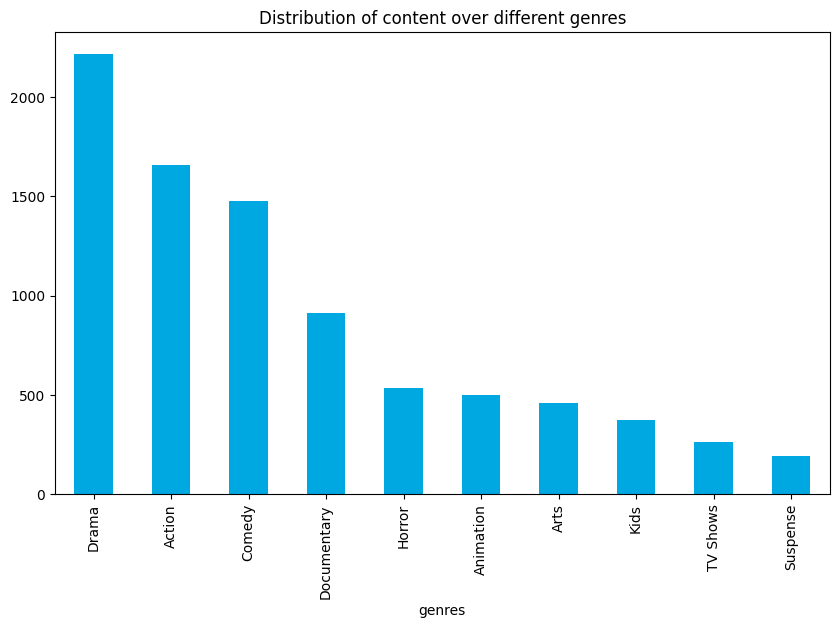

In [16]:
top_genres = df['genres'].str.split(',').str.get(0)
plt.figure(figsize = (10,6))
top_genres.value_counts().head(10).plot(kind="bar", color = "#00A8E1")
plt.title("Distribution of content over different genres")

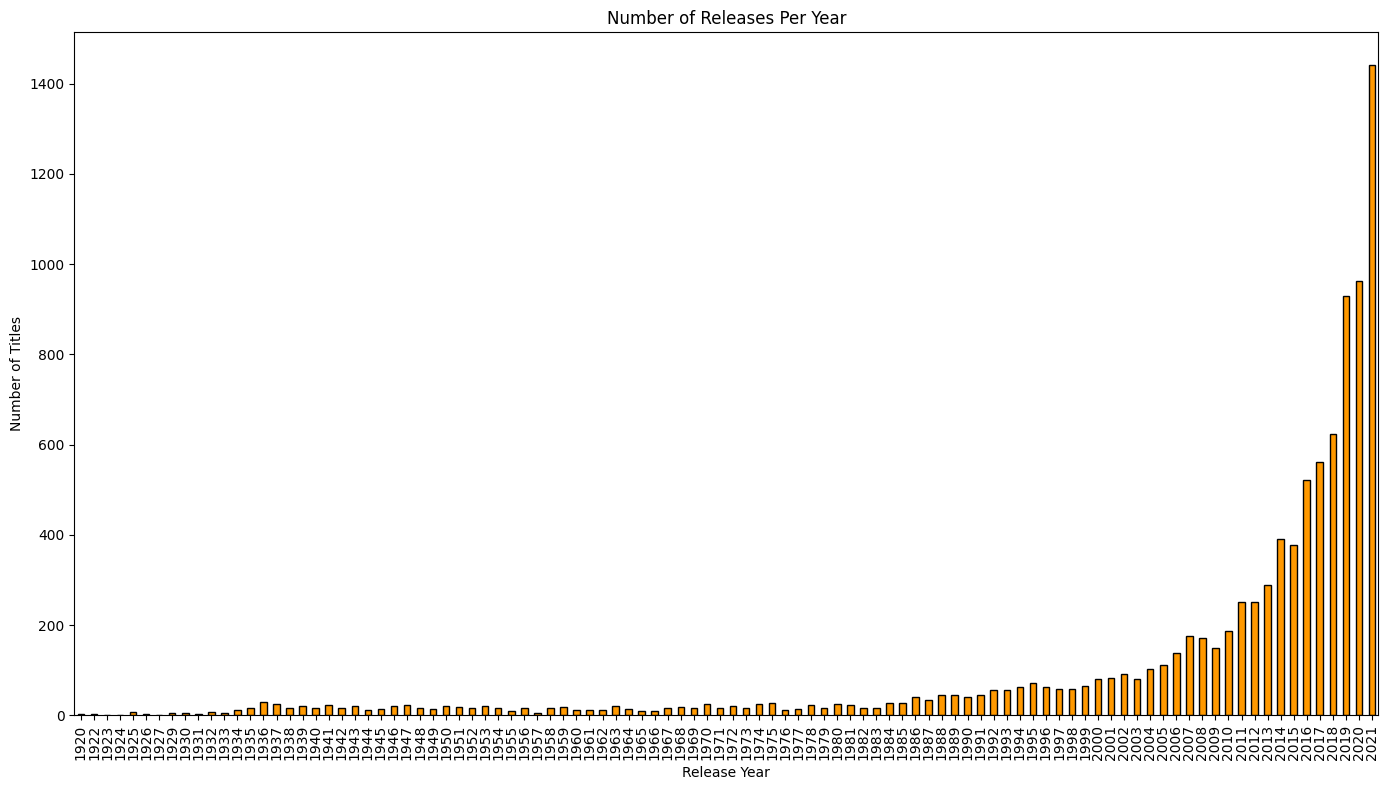

In [17]:
plt.figure(figsize=(14,8))
df['release_year'].value_counts().sort_index().plot(kind="bar", color = "#FF9900", edgecolor = "black")
plt.title("Number of Releases Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

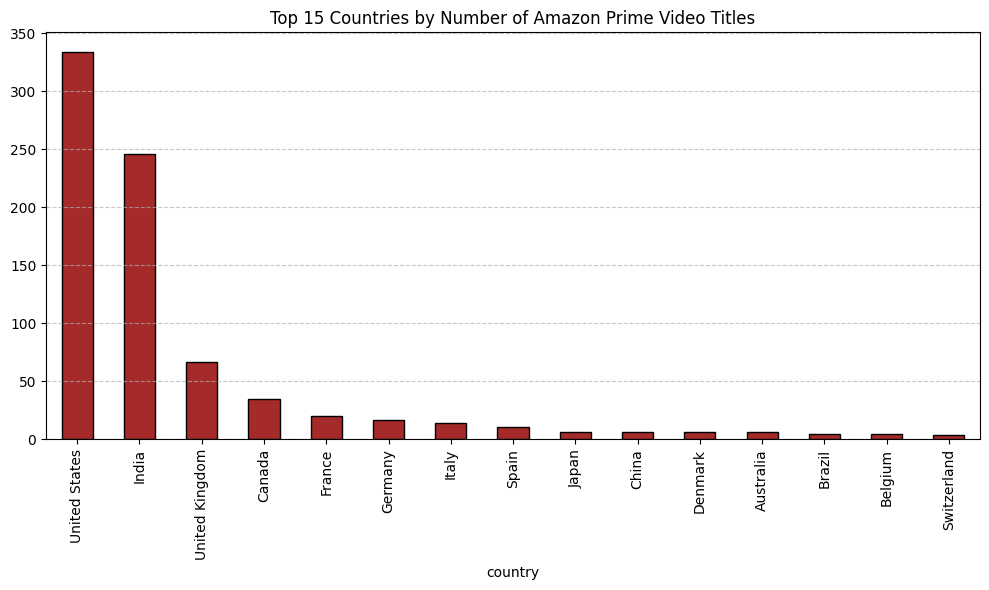

In [18]:
country_counts = (df['country'].dropna().str.split(',').explode().str.strip())
country_counts = country_counts[country_counts != "Unknown"].value_counts().head(15)
plt.figure(figsize=(10,6))
country_counts.plot(kind = "bar", color = "brown", edgecolor = "black")
plt.title("Top 15 Countries by Number of Amazon Prime Video Titles")
plt.grid(axis="y", linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Entries')

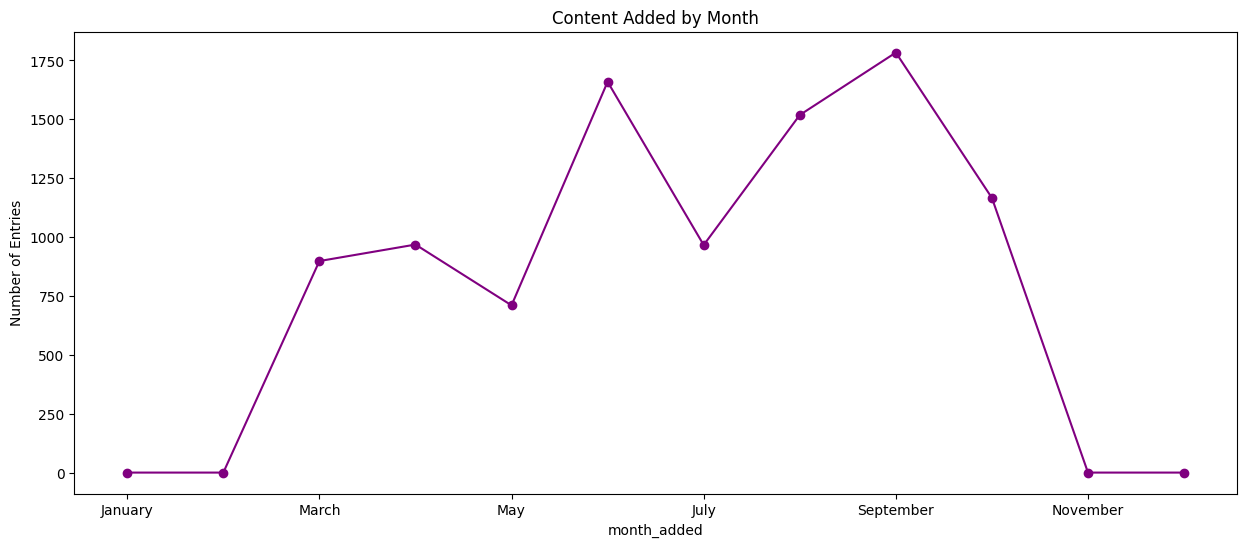

In [19]:
import calendar

df['month_added'] = df['month_added'].apply(lambda x: calendar.month_name[int(x)])
month_order = list(calendar.month_name)[1:]
df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)
plt.figure(figsize=(15,6))
df['month_added'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title("Content Added by Month")
plt.ylabel("Number of Entries")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\787188185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating',


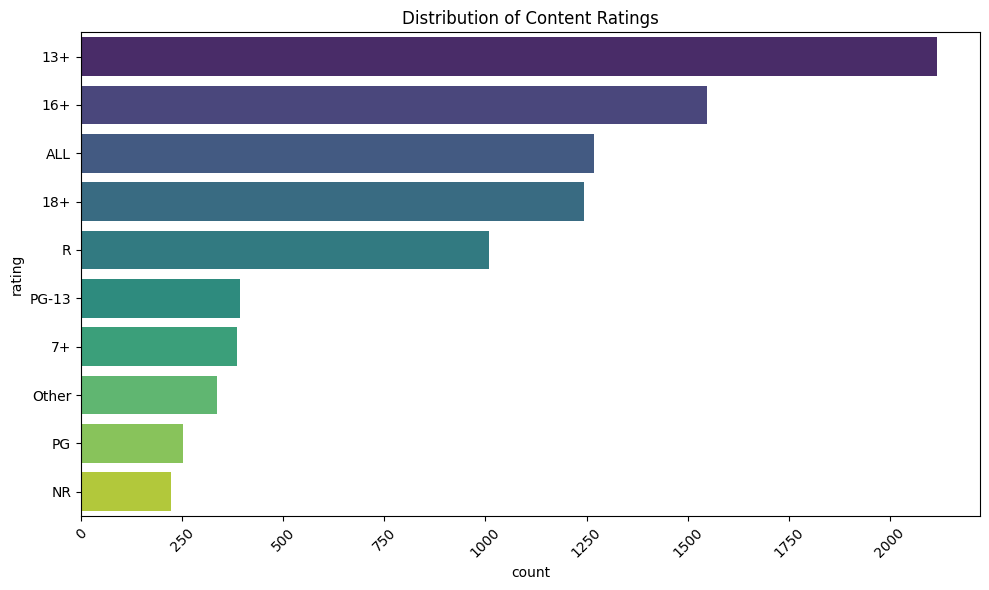

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating',
order = df['rating'].value_counts().index[:10], palette="viridis")
plt.title("Distribution of Content Ratings")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [21]:
df['duration_minutes'] = df['duration'].str.extract(r'(\d+) min').astype(float)
df['duration_seasons'] = df['duration'].str.extract(r'(\d+) Season').astype(float)

In [22]:
movies_df = df['duration_minutes'] = df['duration'].str.extract(r'(\d+) min').astype(float)

In [23]:
tv_shows_df = df['duration_minutes'] = df['duration'].str.extract(r'(\d+) Season').astype(float)

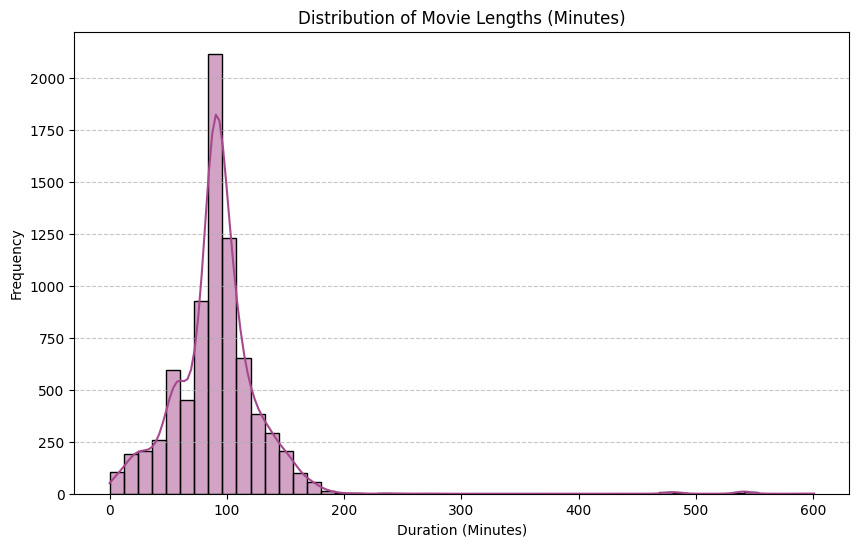

In [24]:
plt.figure(figsize=(10,6))
# Specify the exact column (e.g., 'duration_minutes') to apply the single color
sns.histplot(data=movies_df, x=movies_df[0], kde=True, color="#A6488D", bins=50)
plt.title('Distribution of Movie Lengths (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\3742184964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=tv_shows_df, x=tv_shows_df[0], palette='viridis')


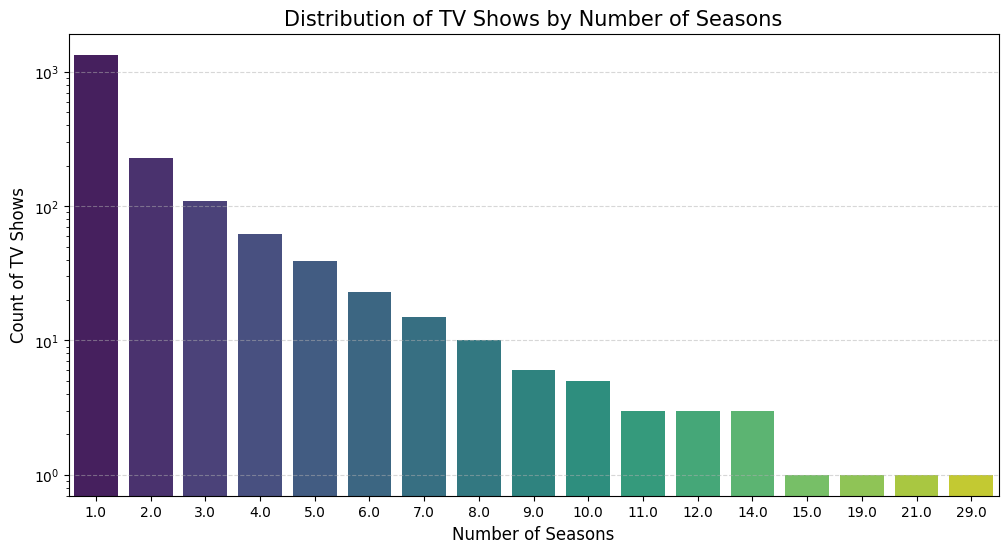

In [25]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=tv_shows_df, x=tv_shows_df[0], palette='viridis')
ax.set_yscale("log")
plt.title('Distribution of TV Shows by Number of Seasons', fontsize=15)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count of TV Shows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [26]:
genre_df = df.copy()

In [27]:
genre_df = genre_df.explode('genres')

In [28]:
top_genres = genre_df['genres'].value_counts().nlargest(5).index
df_top_genres = genre_df[genre_df['genres'].isin(top_genres)]


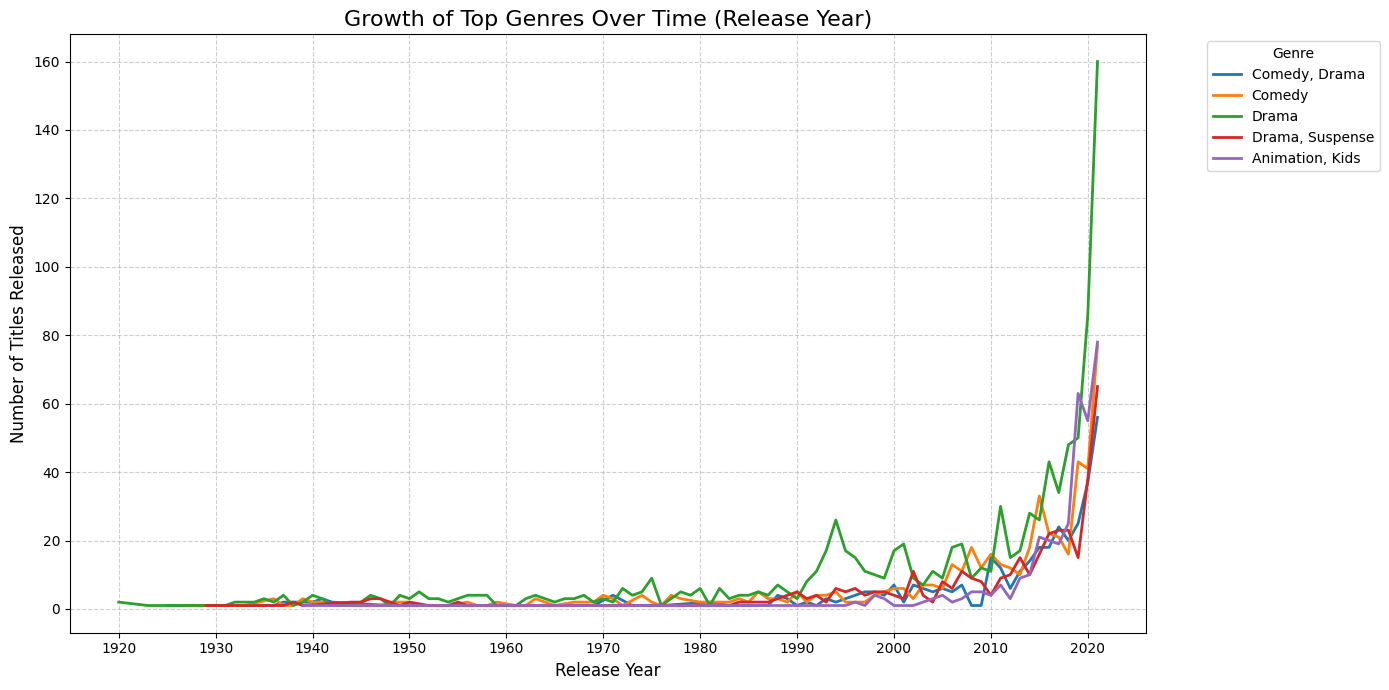

In [29]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_genres, x='release_year', y=df_top_genres.groupby(['release_year', 'genres']).transform('count')['show_id'], 
             hue='genres', linewidth=2)

start_year = df['release_year'].min()
end_year = df['release_year'].max()
plt.xticks(np.arange(start_year, end_year + 1, 10))
plt.title('Growth of Top Genres Over Time (Release Year)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
genre_df["genre_list"] = genre_df['genres'].str.split(',')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\853439753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


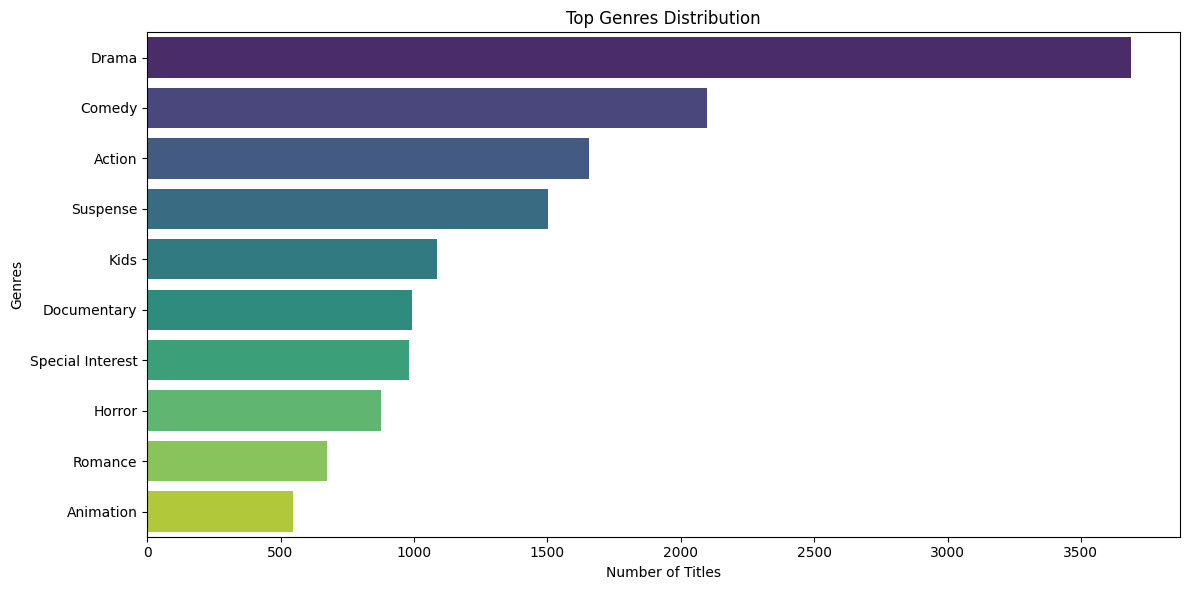

In [31]:
all_genres = genre_df['genre_list'].explode().str.strip()
genre_counts = all_genres.value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top Genres Distribution")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()

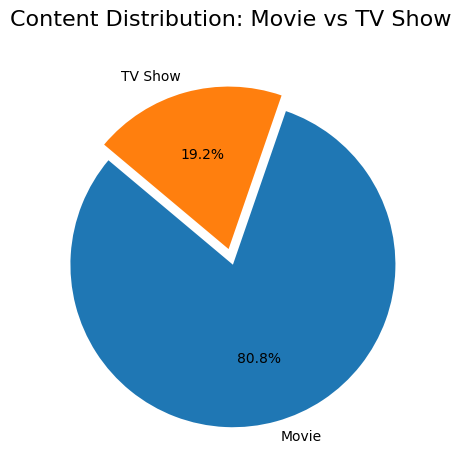

In [32]:
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, explode=[0.05] * len(type_counts))
plt.title('Content Distribution: Movie vs TV Show', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\2144818573.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)


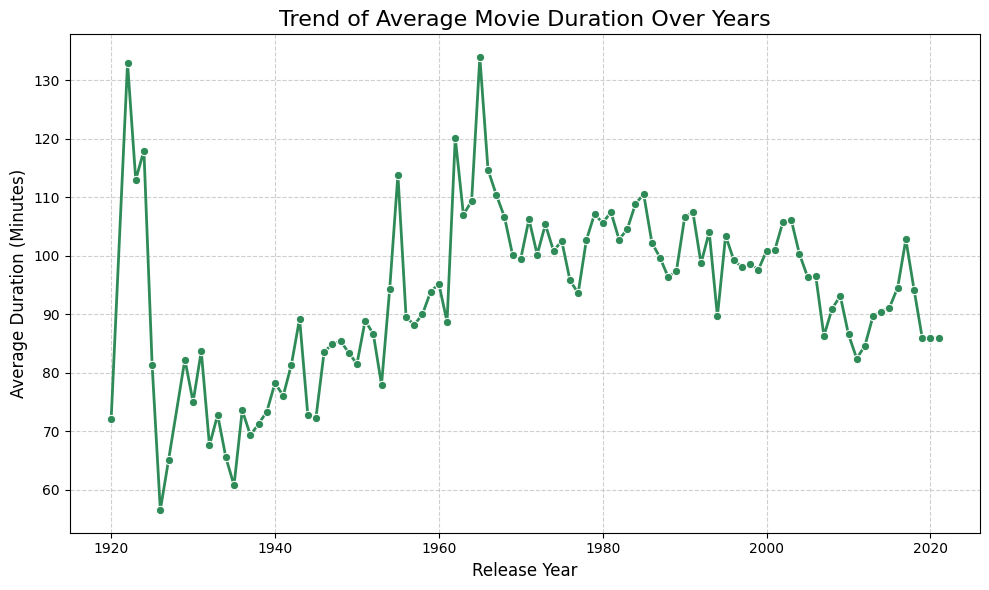

In [33]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)
avg_duration = df_movies.groupby('release_year')['duration_minutes'].mean().dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_duration.index, y=avg_duration.values, color='seagreen', linewidth=2, marker='o')
plt.title('Trend of Average Movie Duration Over Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Duration (Minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

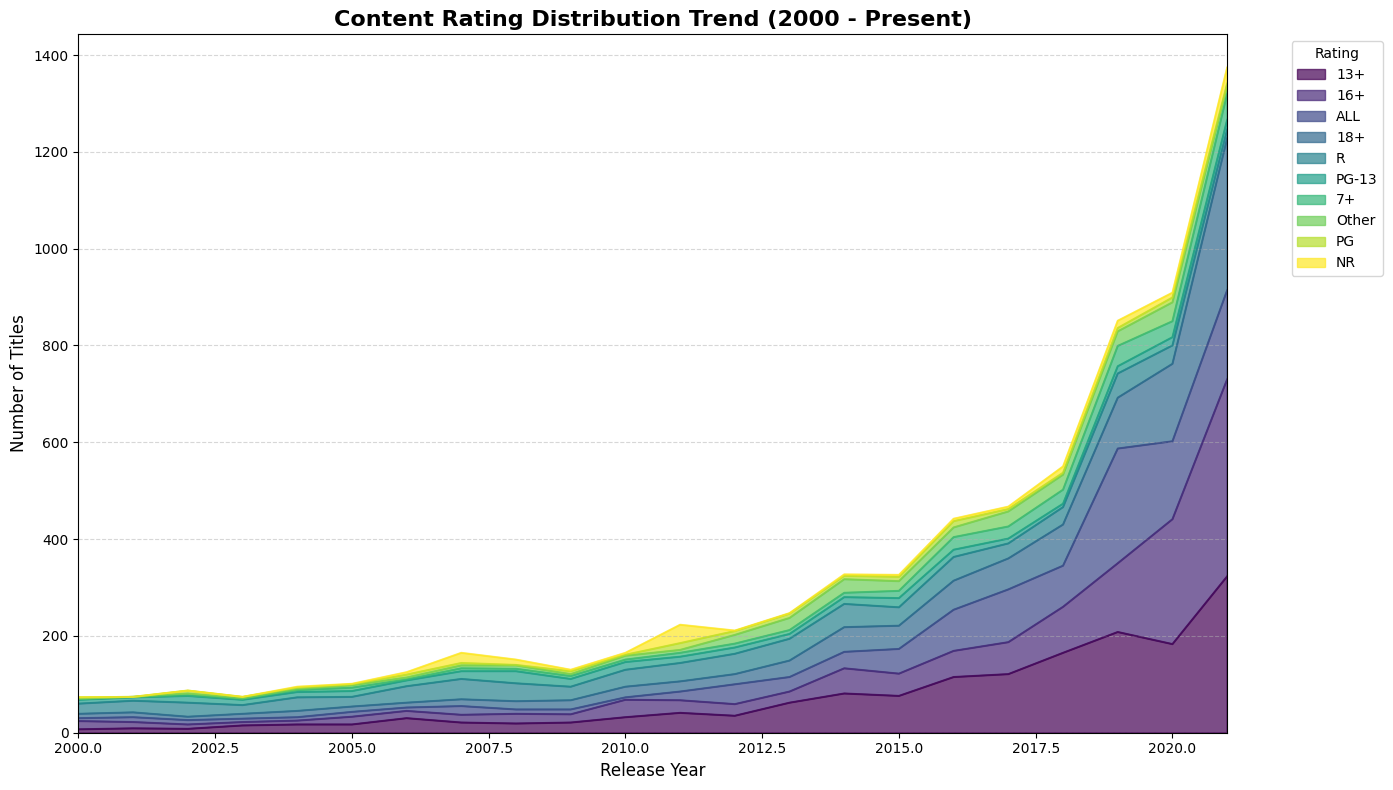

In [34]:
rating_trends = df.groupby(['release_year', 'rating']).size().unstack(fill_value=0)
top_ratings = df['rating'].value_counts().nlargest(10).index
rating_trends_filtered = rating_trends[top_ratings]

plt.figure(figsize=(14, 8))
rating_trends_filtered.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7, ax=plt.gca())
plt.title('Content Rating Distribution Trend (2000 - Present)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xlim(2000, df['release_year'].max())
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

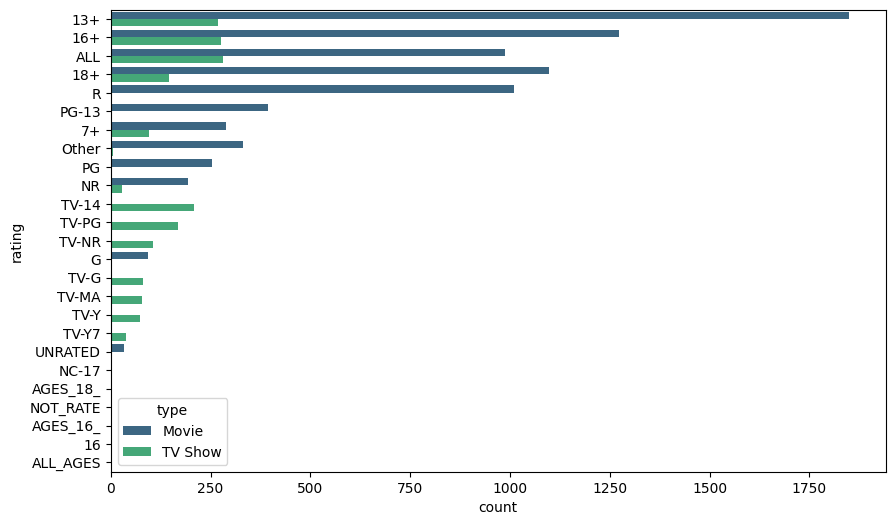

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', hue='type', palette='viridis', order=df['rating'].value_counts().index)
plt.show()